# ROC 곡선 (Receiver Operating Characteristic Curve)

ROC 곡선은 이진 분류 모델의 성능을 평가하기 위한 중요한 시각화 도구임.
이 곡선은 분류기의 **결정 임계값(Threshold)**이 변함에 따라 **참 긍정 비율(True Positive Rate)**과 **거짓 긍정 비율(False Positive Rate)**이 어떻게 변하는지를 보여줌. 이를 통해 특정 임계값에 의존하지 않고 모델의 전반적인 예측 성능을 종합적으로 파악할 수 있음.

### 수학적 배경 📐
ROC 곡선을 이해하기 위해서는 두 가지 핵심 지표에 대한 이해가 필요함.
- **참 긍정 비율 (True Positive Rate, TPR):** 실제 값이 '긍정(Positive)'인 데이터 중에서 모델이 '긍정'으로 올바르게 예측한 비율. **민감도(Sensitivity)** 또는 **재현율(Recall)**이라고도 불림.
$$TPR = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}$$
- **거짓 긍정 비율 (False Positive Rate, FPR):** 실제 값이 '부정(Negative)'인 데이터 중에서 모델이 '긍정'으로 잘못 예측한 비율.
$$FPR = \frac{\text{False Positives (FP)}}{\text{False Positives (FP)} + \text{True Negatives (TN)}}$$

ROC 곡선 아래의 면적을 **AUC(Area Under the Curve)**라고 하며, 0과 1 사이의 값을 가짐. AUC 값은 모델이 얼마나 클래스를 잘 구별하는지를 나타내는 지표로, 1에 가까울수록 성능이 우수함을 의미함.

In [1]:
# !pip install numpy matplotlib scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

### 예제 데이터 준비 (Data Preparation)

In [2]:
# 이진 분류를 위한 가상 데이터셋 생성
X, y = make_classification(
    n_samples=1000,      # 데이터 포인트 수
    n_features=20,       # 특징(feature) 수
    n_classes=2,         # 클래스 수
    random_state=42      # 재현성을 위한 시드
)

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"훈련 데이터 형태: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"테스트 데이터 형태: X_test={X_test.shape}, y_test={y_test.shape}")

훈련 데이터 형태: X_train=(700, 20), y_train=(700,)
테스트 데이터 형태: X_test=(300, 20), y_test=(300,)


### 핵심 로직 구현 (Code Implementation)

In [3]:
# 로지스틱 회귀 모델 정의 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 확률 계산 (긍정 클래스에 대한 확률)
# roc_curve 함수는 레이블이 아닌 확률값을 필요로 함
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(f"예측 확률값 (상위 5개):\n{y_pred_proba[:5]}")

예측 확률값 (상위 5개):
[0.60953667 0.86892926 0.51390947 0.77908938 0.95372366]


In [4]:
# ROC 곡선을 그리기 위한 값들 계산
# roc_curve는 다양한 임계값에 대한 fpr, tpr을 반환함
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC(Area Under the Curve) 계산
roc_auc = auc(fpr, tpr)

print(f"계산된 FPR의 개수: {len(fpr)}")
print(f"계산된 TPR의 개수: {len(tpr)}")
print(f"사용된 임계값의 개수: {len(thresholds)}")
print(f"계산된 AUC 값: {roc_auc:.4f}")

계산된 FPR의 개수: 74
계산된 TPR의 개수: 74
사용된 임계값의 개수: 74
계산된 AUC 값: 0.9142


### 결과 확인 및 시각화 📊 (Results & Visualization)

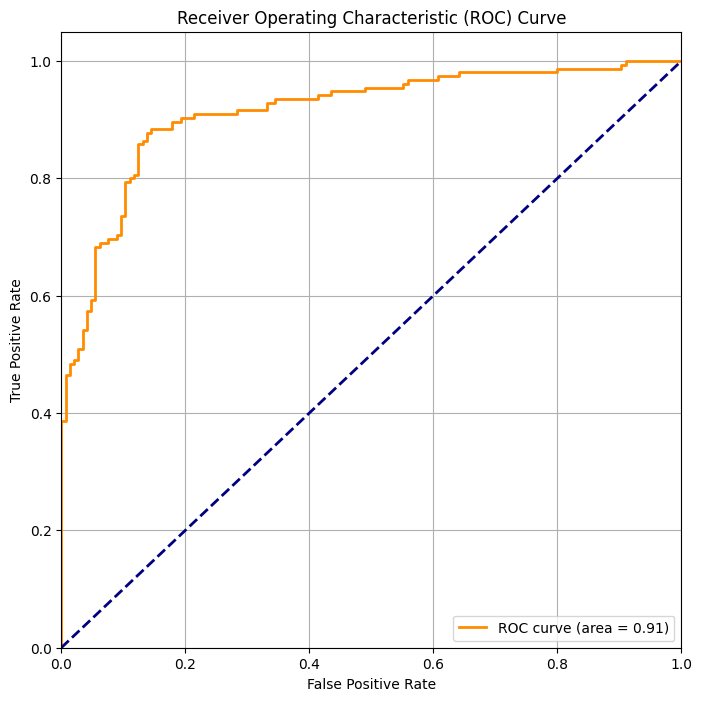

In [5]:
plt.figure(figsize=(8, 8))

# ROC 곡선 그리기
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# 무작위 분류기 수준의 점선 그리기 (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# 그래프 설정
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 고려사항 (Considerations)

- **이상적인 곡선:** 좋은 모델의 ROC 곡선은 그래프의 왼쪽 상단(좌표 0, 1)에 최대한 가까워짐. 이는 낮은 FPR(거짓을 긍정으로 잘못 판단하는 비율)을 유지하면서 높은 TPR(참을 긍정으로 올바르게 판단하는 비율)을 달성한다는 의미.
- **AUC의 활용:** AUC 점수는 모델 간의 성능을 정량적으로 비교하는 데 유용함. 특히 데이터 클래스 분포가 불균형할 때 정확도(Accuracy)보다 더 신뢰성 있는 평가 지표가 될 수 있음.
- **임계값 선택:** ROC 곡선 자체는 모델의 성능을 보여주지만, 실제 예측에 모델을 사용하려면 특정 임계값을 선택해야 함. 최적의 임계값은 문제의 상황(예: FN 비용 vs. FP 비용)에 따라 달라지며, ROC 곡선은 이 트레이드오프를 시각적으로 분석하는 데 도움을 줌.

### 최종 요약 (Conclusion)

ROC 곡선과 AUC는 이진 분류 모델의 성능을 **임계값에 관계없이** 종합적으로 평가할 수 있는 강력한 도구임.

이 노트북에서는 `scikit-learn`을 사용하여 가상 데이터를 생성하고, 로지스틱 회귀 모델을 학습시킨 후, 예측 확률을 기반으로 ROC 곡선을 시각화하고 AUC 값을 계산하는 전 과정을 시연함. 이를 통해 모델이 두 클래스를 얼마나 효과적으로 구별하는지 직관적으로 파악할 수 있음.